In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")
sns.set_palette('muted')
sns.set_context("poster", font_scale=1, rc={
                "grid.linewidth": 5, "axes.linewidth": 5})

In [2]:
data = pd.read_csv('dados_vendas_censo_clean.csv')

In [3]:
groupBy_Bairro = data.groupby('Bairro')
m_bairro = groupBy_Bairro.Metragem.mean().sort_values(ascending=False)
v_bairro = groupBy_Bairro['Valor_anuncio'].mean().sort_values(ascending=False)
q_bairro = groupBy_Bairro.Quartos.mean().sort_values(ascending=False)


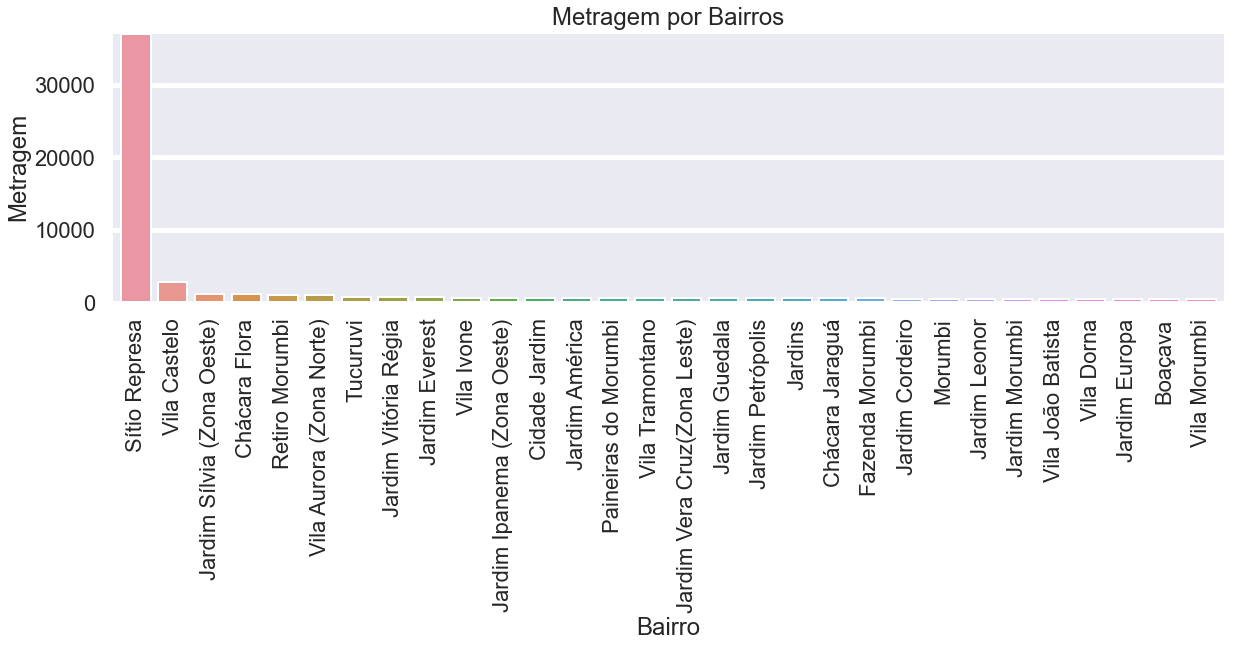

In [4]:
samples = m_bairro.head(30)
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=samples.index, y=samples)
ax.set_title('Metragem por Bairros')
ax.set_ylabel('Metragem')
ax.set_xticklabels(samples.index, rotation=90)
ax.margins(0.01)
plt.show()

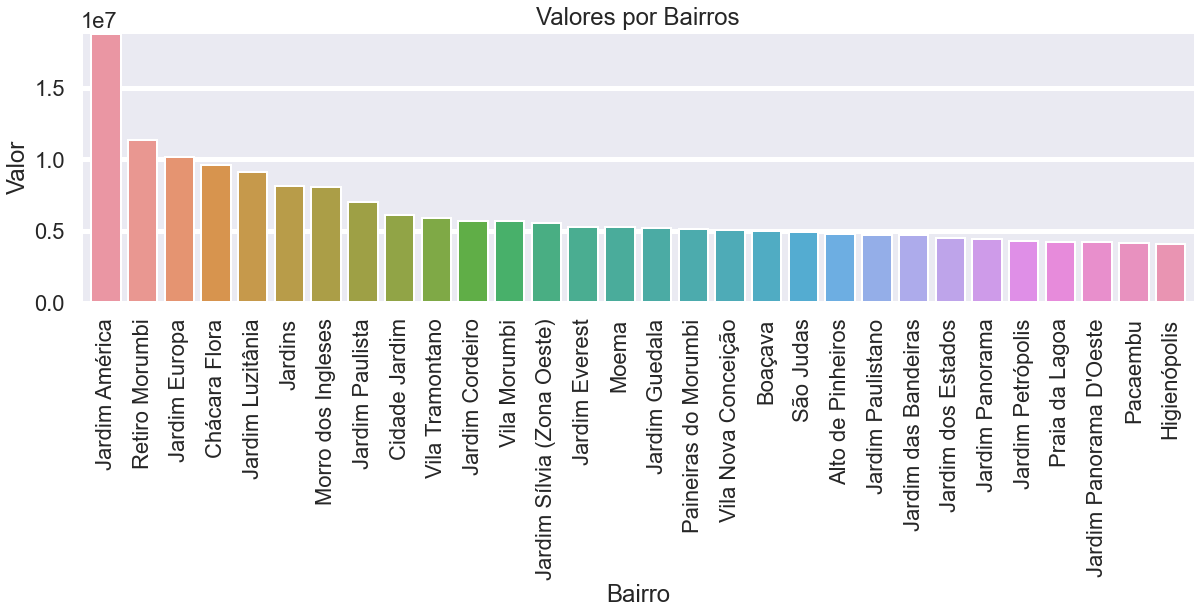

In [5]:
samples = v_bairro.head(30)
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=samples.index, y=samples)
ax.set_title('Valores por Bairros')
ax.set_ylabel('Valor')
ax.set_xticklabels(samples.index, rotation=90)
ax.margins(0.01)
plt.show()


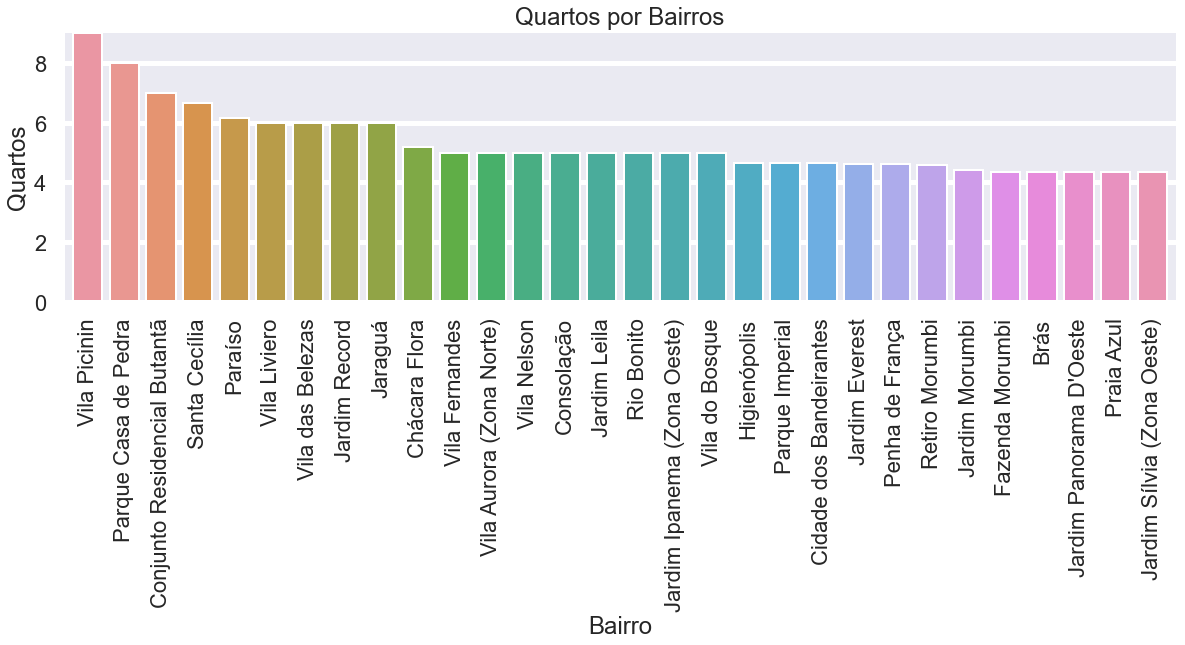

In [6]:
samples = q_bairro.head(30)
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=samples.index, y=samples)
ax.set_title('Quartos por Bairros')
ax.set_ylabel('Quartos')
ax.set_xticklabels(samples.index, rotation=90)
ax.margins(0.01)
plt.show()


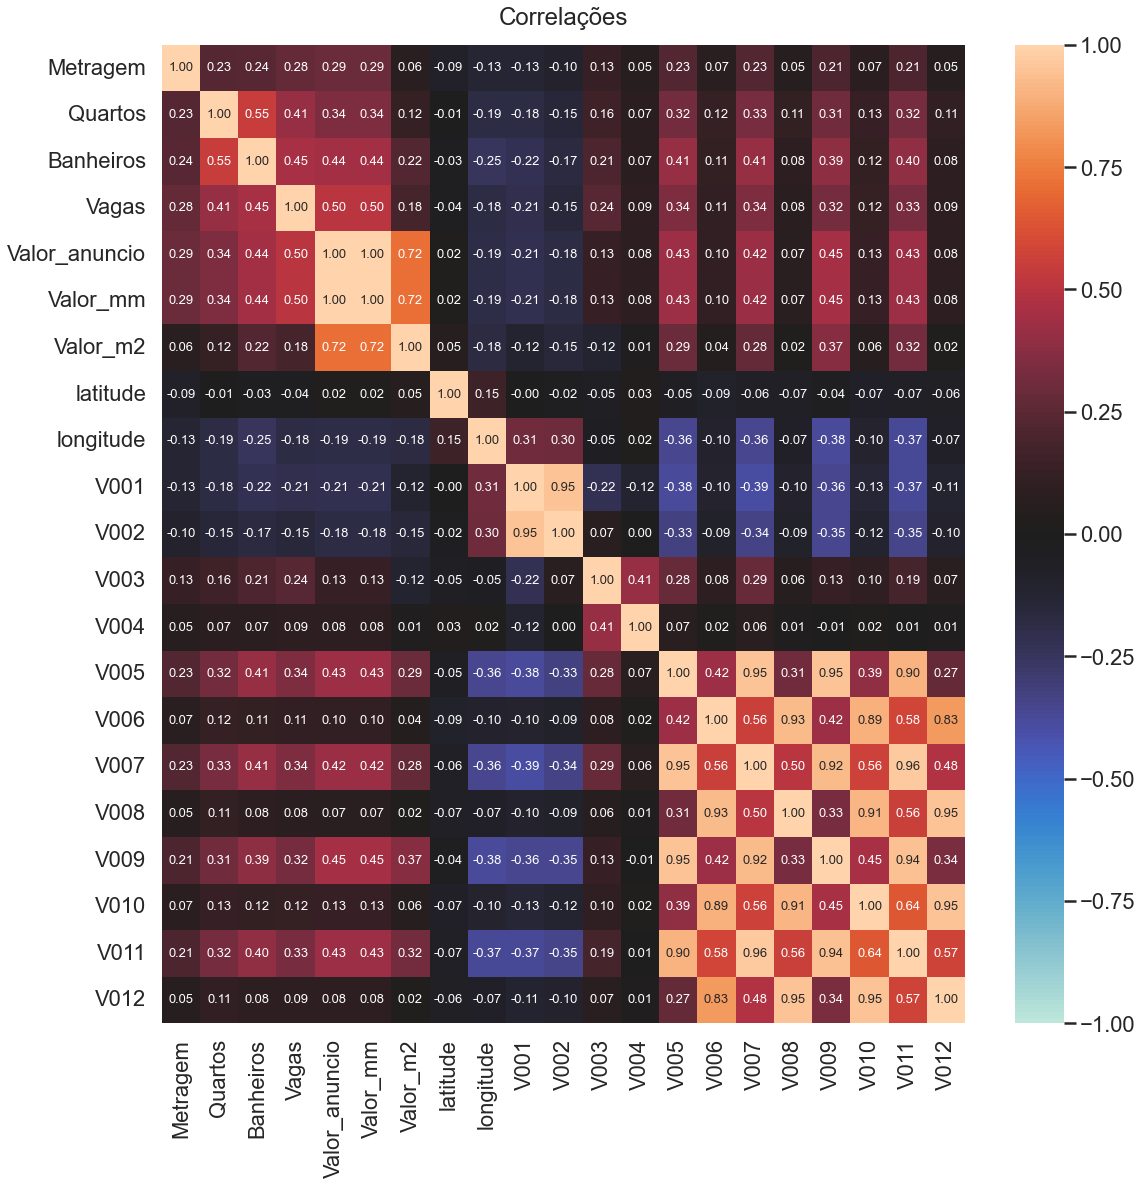

In [7]:
plt.figure(figsize=(18, 18))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1,
                      annot=True, fmt='.2f', annot_kws={"size": 13}, cmap='icefire')
heatmap.set_title('Correlações', pad=20)
plt.show()

(0.0, 25.0)

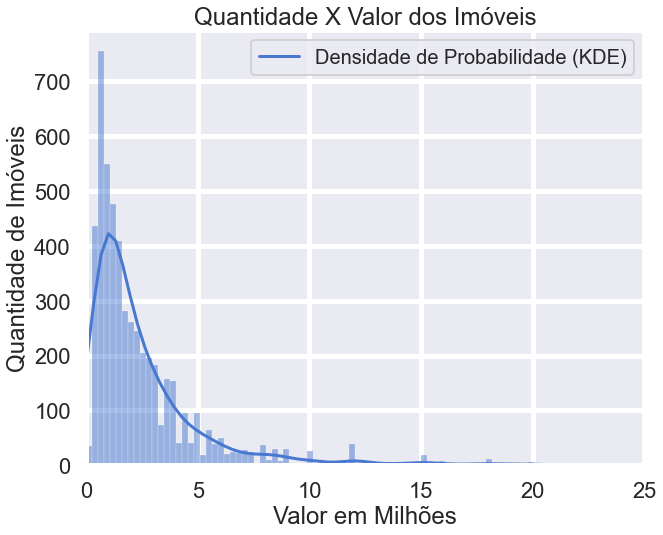

In [8]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(data=data, x="Valor_mm", kde=True)
ax.set_title("Quantidade X Valor dos Imóveis")
ax.set_xlabel("Valor em Milhões")
ax.set_ylabel("Quantidade de Imóveis")
ax.legend(['Densidade de Probabilidade (KDE)'], prop={'size': 20})
plt.xlim((0, 25))

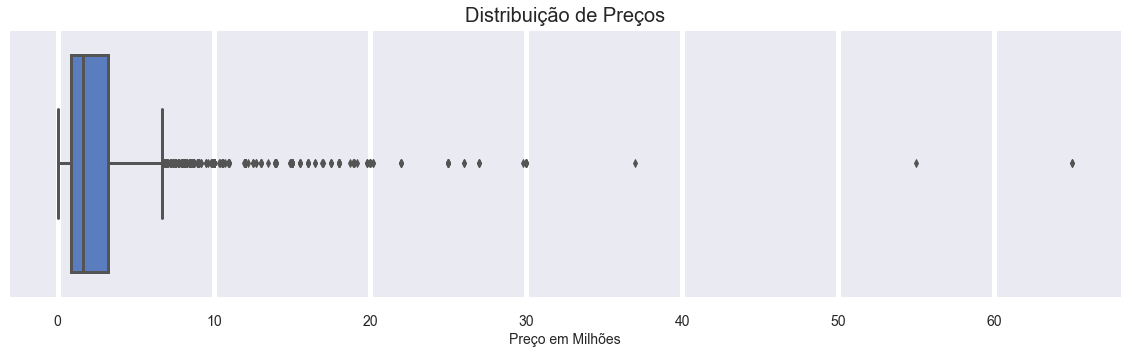

In [9]:
plt.figure(figsize=(20, 5))
ax = sns.boxplot(data['Valor_mm'])
plt.xticks(fontsize=14)
plt.xlabel('Preço em Milhões', fontsize=14)
plt.title('Distribuição de Preços', fontsize=20)
plt.show()

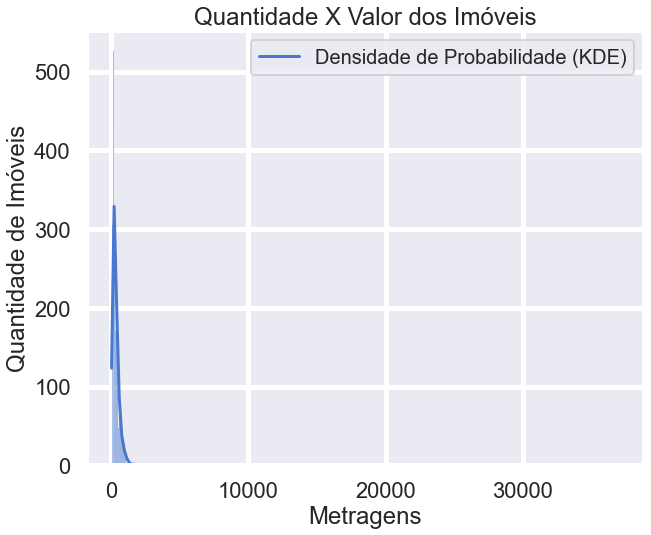

In [10]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(data=data, x="Metragem", kde=True)
ax.set_title("Quantidade X Valor dos Imóveis")
ax.set_xlabel("Metragens")
ax.set_ylabel("Quantidade de Imóveis")
ax.legend(['Densidade de Probabilidade (KDE)'], prop={'size': 20})

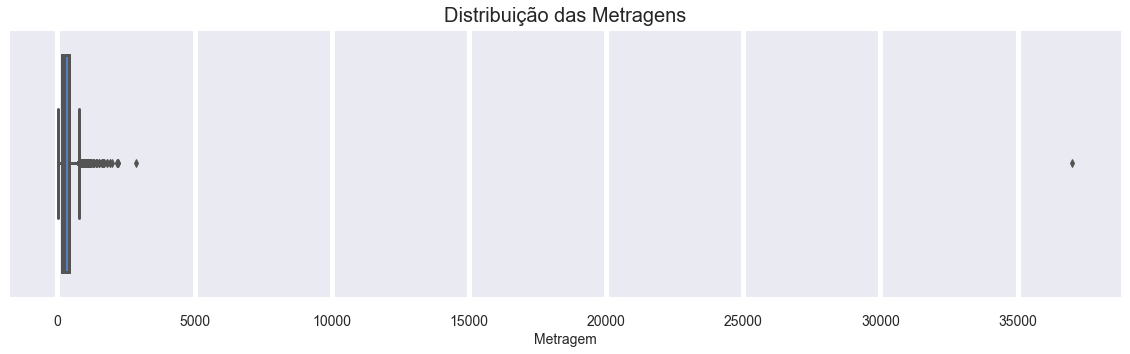

In [11]:
plt.figure(figsize=(20, 5))
ax = sns.boxplot(data['Metragem'])
plt.xticks(fontsize=14)
plt.xlabel('Metragem', fontsize=14)
plt.title('Distribuição das Metragens', fontsize=20)
plt.show()

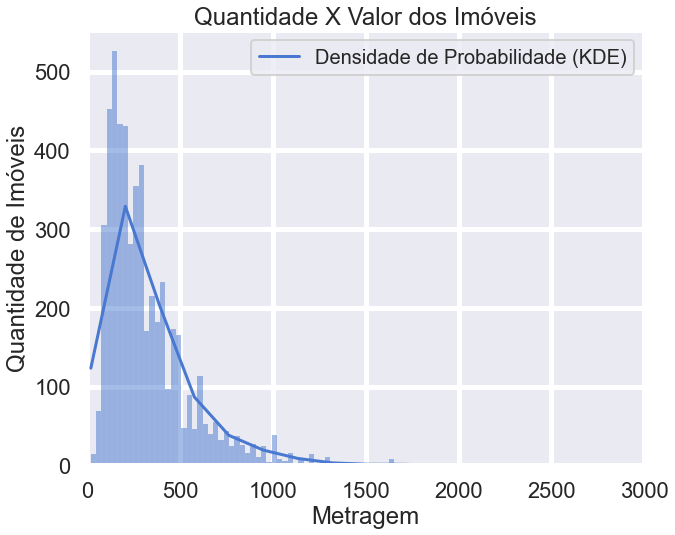

In [12]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(data=data, x="Metragem", kde=True)
ax.set_title("Quantidade X Valor dos Imóveis")
ax.set_xlabel("Metragem")
ax.set_ylabel("Quantidade de Imóveis")
ax.legend(['Densidade de Probabilidade (KDE)'], prop={'size': 20})
ax.set_xlim(-5, 3000)
plt.show()

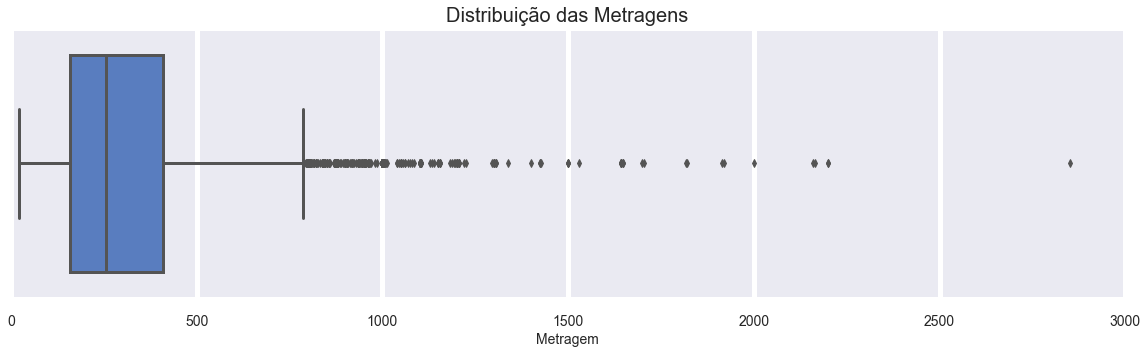

In [13]:
plt.figure(figsize=(20, 5))
ax = sns.boxplot(data['Metragem'])
plt.xticks(fontsize=14)
plt.xlabel('Metragem', fontsize=14)
plt.title('Distribuição das Metragens', fontsize=20)
ax.set_xlim(-5, 3000)
plt.show()


In [14]:
data.drop(data.query(
    'Valor_anuncio > 25000000 | Valor_anuncio < 100000 | Metragem > 3000').index, inplace=True)


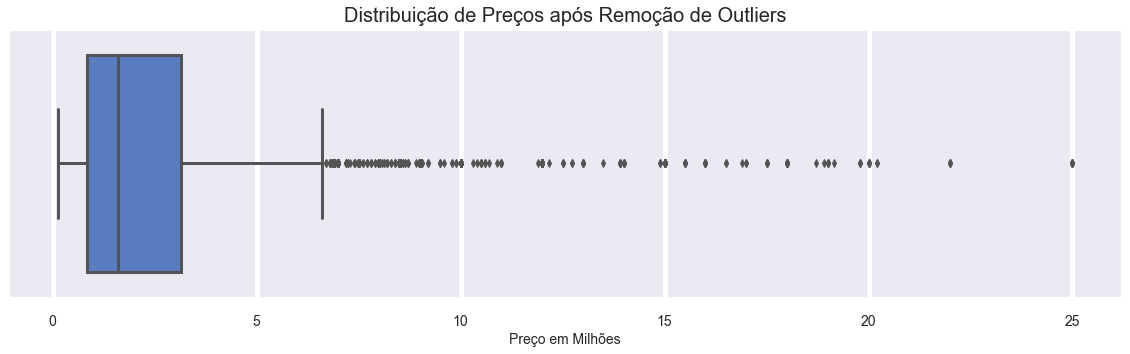

In [15]:
plt.figure(figsize=(20, 5))
ax = sns.boxplot(data['Valor_mm'])
plt.xticks(fontsize=14)
plt.xlabel('Preço em Milhões', fontsize=14)
plt.title('Distribuição de Preços após Remoção de Outliers', fontsize=20)
plt.show()

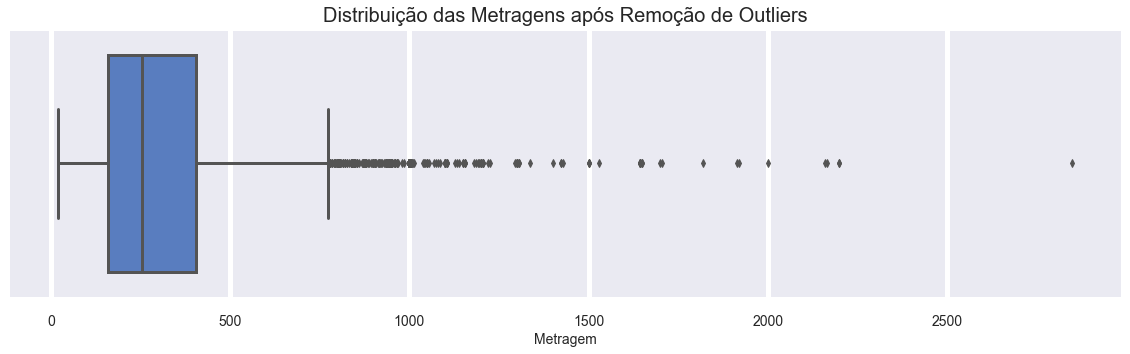

In [16]:
plt.figure(figsize=(20, 5))
ax = sns.boxplot(data['Metragem'])
plt.xticks(fontsize=14)
plt.xlabel('Metragem', fontsize=14)
plt.title('Distribuição das Metragens após Remoção de Outliers', fontsize=20)
plt.show()


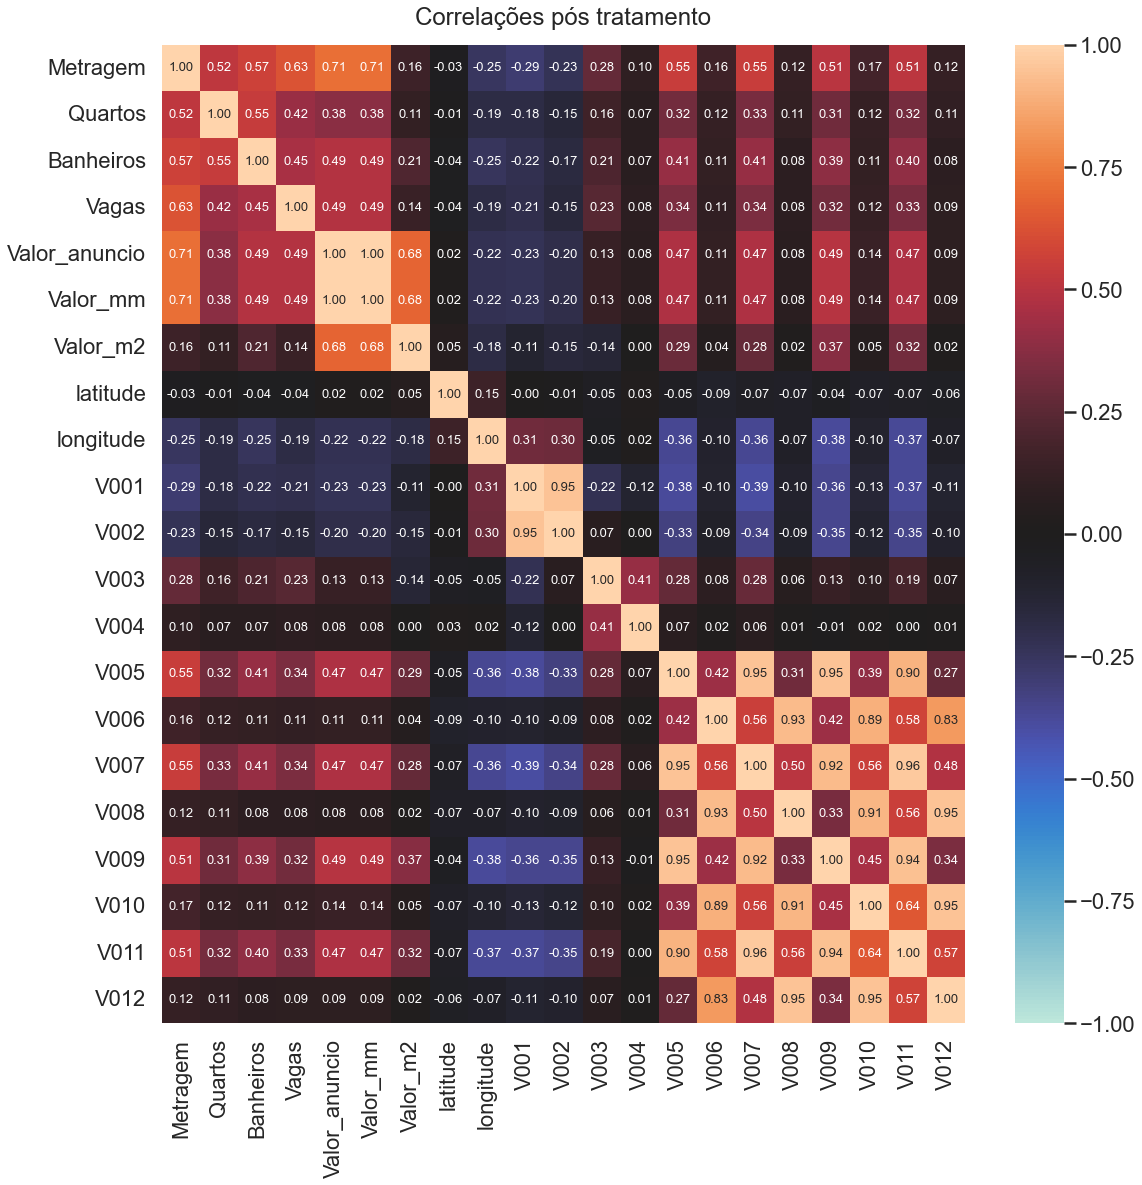

In [17]:
plt.figure(figsize=(18, 18))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1,
                      annot=True, fmt='.2f', annot_kws={"size": 13}, cmap='icefire')
heatmap.set_title('Correlações pós tratamento',pad=20)
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

X = data[['Metragem', 'Quartos', 'Banheiros',
          'latitude', 'longitude', 'V005', 'V007', 'V009', 'V011']]
Y = data['Valor_anuncio']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=54)

In [19]:
knr = KNeighborsRegressor(algorithm='ball_tree',
                          n_neighbors=8, weights='distance')

knr.fit(X_train, Y_train)

Y_train_pred = knr.predict(X_test)

mae = mean_absolute_error(Y_test, Y_train_pred)
r2 = r2_score(Y_test, Y_train_pred)
(mae, r2)


(617266.9174088704, 0.8005379706473179)

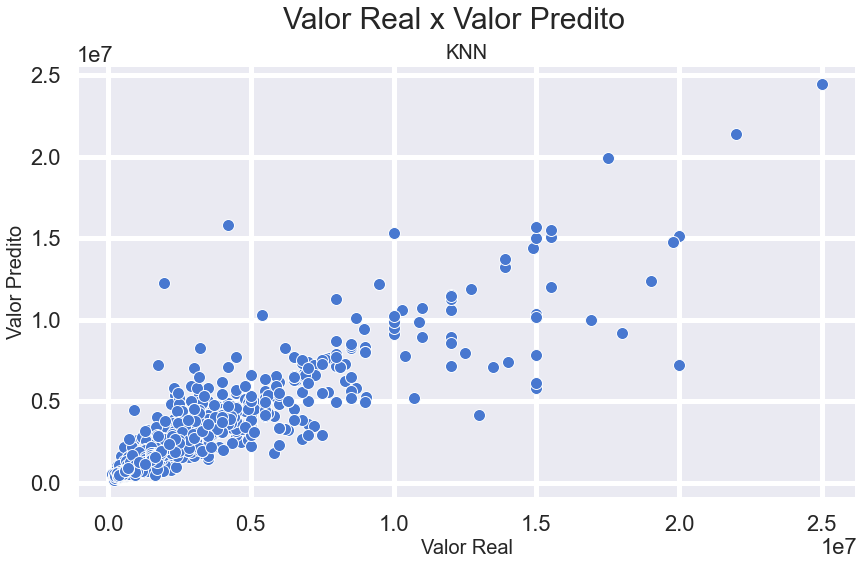

In [20]:
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(x=Y_test, y=Y_train_pred)
ax.set_ylabel('Valor Predito', fontsize=20)
ax.set_xlabel('Valor Real', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(7,7))
ax.figure.suptitle('Valor Real x Valor Predito', fontsize=30)
ax.set_title('KNN', fontsize=20)
plt.show()